In [139]:
# from google.colab import drive
# drive.mount('/content/drive')

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path

# Uma Análise da Exportação de Vinhos - Brasil

## Base de dados

In [141]:
df_completo = pd.read_csv('/content/ExpVinho.csv', sep=';', thousands='.', decimal=',')
df_completo.drop(columns=['Id'], inplace=True)
df_completo.rename(columns={'País': 'pais'}, inplace=True)

In [142]:
df_completo.head()

,pais,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
2,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
3,Angola,0,0,0,0,0,0,0,0,0,...,10170,61680,477,709,345,1065,0,0,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Os anos com sufixo '.1' representam o valor de vendas em reais (R$), e os sem esse sufixo representam a quantidade em litros exportada

In [143]:
df_completo_copy = df_completo.copy()
colunas = df_completo_copy.columns

In [144]:
cols_ponto = pd.Series(colunas.values).str.contains(r'\.1').values

### Vendas (US$) por País nos Últimos 15 anos


In [145]:
cols_valor = colunas.values[cols_ponto][-15:]
cols_valor = np.insert(cols_valor, 0, 'pais', axis=0)

In [146]:
df_valor = df_completo_copy[cols_valor]
df_valor.columns = np.char.replace(df_valor.columns.values.astype(str), '.1','')
df_valor.head()


,pais,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,95,21,0
2,"Alemanha, República Democrática",238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741
3,Angola,49753,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
df_valor_total = df_valor.set_index('pais')
df_valor_total = df_valor_total.sum(axis=1)
df_valor_total.rename('valor_total', inplace=True)

pais
Afeganistão                             46
África do Sul                          116
Alemanha, República Democrática    2739079
Angola                              621181
Anguilla                                 0
                                    ...   
Tuvalu                                   4
Uruguai                             222511
Vanuatu                                 31
Venezuela                            83847
Vietnã                               12736
Name: valor_total, Length: 124, dtype: int64

### Quantidade Exportada por País nos Últimos 15 Anos

In [148]:
cols_quant = colunas.values[~cols_ponto][-15:]
cols_quant = np.insert(cols_quant, 0, 'pais', axis=0)

In [149]:
df_quant = df_completo_copy[cols_quant]
df_quant.head()

,pais,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
1,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,26,4,0
2,"Alemanha, República Democrática",119512,265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698
3,Angola,25931,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [150]:
df_quant_total = df_quant.set_index('pais')
df_quant_total = df_quant_total.sum(axis=1)
df_quant_total.rename('quant_total', inplace=True)

pais
Afeganistão                             11
África do Sul                           30
Alemanha, República Democrática    1020933
Angola                              190731
Anguilla                                 0
                                    ...   
Tuvalu                                   2
Uruguai                             155478
Vanuatu                                 18
Venezuela                            52995
Vietnã                                9669
Name: quant_total, Length: 124, dtype: int64

### Total por País dos Útlimos 15 Anos

In [151]:
df_totais = df_valor_total.to_frame().reset_index()
df_totais.insert(0, 'exportador', 'Brasil')
df_totais = df_totais.merge(df_quant_total, left_on='pais', right_index=True)
df_totais

,exportador,pais,valor_total,quant_total
0,Brasil,Afeganistão,46,11
1,Brasil,África do Sul,116,30
2,Brasil,"Alemanha, República Democrática",2739079,1020933
3,Brasil,Angola,621181,190731
4,Brasil,Anguilla,0,0
...,...,...,...,...
119,Brasil,Tuvalu,4,2
120,Brasil,Uruguai,222511,155478
121,Brasil,Vanuatu,31,18
122,Brasil,Venezuela,83847,52995


## Análises

### Países importadores

In [152]:
df_totais.shape

(124, 4)

In [153]:
df_quant_total[df_quant_total > 0].count()

114

Existem 124 países registrados na base, onde, durante o período de 15 anos, 114 deles já importaram vinho ao menos uma vez.

In [154]:
df_quant_util:pd.DataFrame = df_quant.copy()
df_quant_util.drop(columns='pais', inplace=True)
df_quant_util = df_quant_util.T

for col in df_quant_util.columns.values:
  df_quant_util.loc[(df_quant_util[col] > 0), col] = 1

df_quant_util['total'] = df_quant_util.sum(axis=1)

In [155]:
df_quant_util.loc[:, 'total'].max()

74

O máximo de países atendidos em um ano foi de 74

[Text(0.5, 0, 'ano'),
 Text(0, 0.5, 'quantidade de países'),
 Text(0.5, 1.0, 'Quantidade de países importadores por ano')]

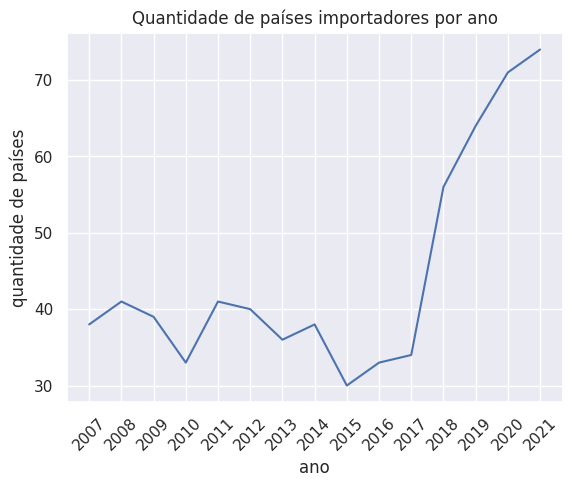

In [156]:
eixo_x = df_quant_util.index
eixo_y = df_quant_util['total']
sns.set_theme(style="darkgrid")
graf_1 = sns.lineplot(x=eixo_x, y=eixo_y)
plt.xticks(rotation=45)
graf_1.set(xlabel="ano", ylabel="quantidade de países", title="Quantidade de países importadores por ano")

In [157]:
aumento_4_anos = df_quant_util.loc['2021', 'total'] - df_quant_util.loc['2017', 'total']
aumento_4_anos

40

In [158]:
aumento_paises = aumento_4_anos / df_quant_util.loc['2017', 'total'] * 100
f'{aumento_paises:.2f}%'

'117.65%'

De 2017 até 2021 houve um aumento de 40 países que importam vinho. Isso representa um aumento de 117,65% em um período de 4 anos

### Quantidade de Exportações

In [159]:
df_quant_g = df_quant.copy()
df_quant_g.drop(columns='pais', inplace=True)
df_quant_g = df_quant_g.T

df_quant_g['total'] = df_quant_g.sum(axis=1)

[Text(0.5, 0, 'ano'),
 Text(0, 0.5, 'Litros exportados (em milhões)'),
 Text(0.5, 1.0, 'Quantidade de Litros Exportados por Ano')]

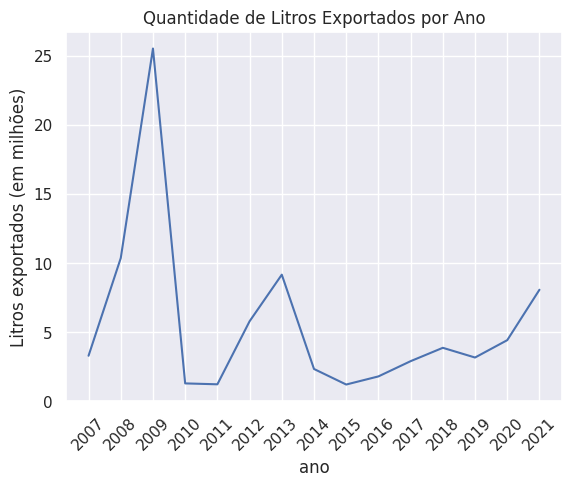

In [160]:
eixo_x = df_quant_g.index
eixo_y = df_quant_g['total'] / 1_000_000
graf_2 = sns.lineplot(data=df_quant_g, x=eixo_x, y=eixo_y)
plt.xticks(rotation=45)
graf_2.set(xlabel="ano", ylabel="Litros exportados (em milhões)", title="Quantidade de Litros Exportados por Ano")

In [161]:
df_valor_g = df_valor.copy()
df_valor_g.drop(columns='pais', inplace=True)
df_valor_g = df_valor_g.T

df_valor_g['total'] = df_valor_g.sum(axis=1)

<ipython-input-162-e3a7b545aa51>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  graf_2.set_xticklabels(labels=graf_2.get_xticklabels(), rotation=45)


[Text(0.5, 0, 'ano'),
 Text(0, 0.5, 'Vendas em milhões de doláres'),
 Text(0.5, 1.0, 'US$ de exportação por Ano')]

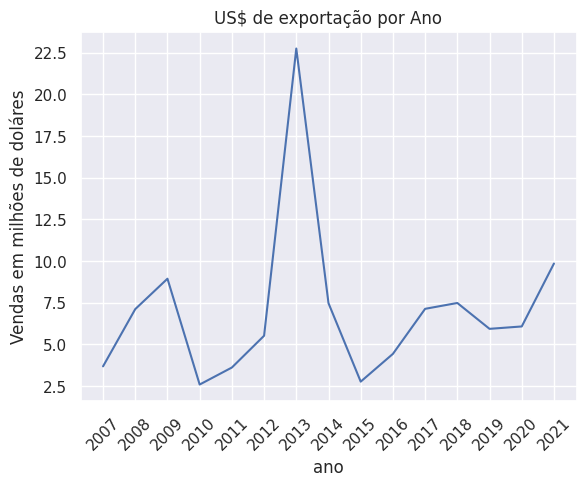

In [162]:
eixo_x_v = df_valor_g.index
eixo_y_v = df_valor_g['total'] / 1_000_000
graf_2 = sns.lineplot(data=df_valor_g, x=eixo_x_v, y=eixo_y_v)
graf_2.set_xticklabels(labels=graf_2.get_xticklabels(), rotation=45)
graf_2.set(xlabel="ano", ylabel="Vendas em milhões de doláres", title="US$ de exportação por Ano")

### Proporcionalidade por ano

In [163]:
#Verificar os paises que fizeram compras nos anos, e a quantidade de compras que fizeram nos ultimos 15 anos
df_ca = df_valor.copy().set_index('pais')
df_ca_util = df_ca.loc[(df_valor_total > 0).index.values,:]
df_ca_util = df_ca_util.T
for col in df_ca_util.columns.values:
  df_ca_util.loc[(df_ca_util[col] > 0), col] = 1

df_ca_util = df_ca_util.T
df_ca_util['quant_compras'] = df_ca_util.sum(axis=1)
df_ca_util.sort_values('quant_compras', ascending=False, inplace=True)
df_ca_util.reset_index(inplace=True)
df_ca_util = df_ca_util[df_ca_util['quant_compras']>0]

In [164]:
#Proporcionalidade entre a quantidade de compras nos últimos 15 anos com o valor total e a quantidade em litros importada por país
df_prop_ano = df_ca_util.merge(df_valor_total, left_on='pais', how='left', right_index=True)
df_prop_ano = df_prop_ano.merge(df_quant_total, left_on='pais', how='left', right_index=True)
df_prop_ano = df_prop_ano.loc[:,['pais', 'quant_compras', 'valor_total', 'quant_total']]
df_prop_ano['valor_prop'] = df_prop_ano['valor_total'] / df_prop_ano['quant_compras']
df_prop_ano['quant_prop'] = df_prop_ano['quant_total'] / df_prop_ano['quant_compras']
df_prop_ano['pais'] = df_prop_ano['pais'].replace(', República Democrática', '', regex=True)

In [165]:
df_prop_ano_valor = df_prop_ano[['pais', 'valor_prop']]
df_prop_ano_valor = df_prop_ano_valor.sort_values('valor_prop', ascending=False).head(10).round(decimals=0)
df_prop_ano_valor

,pais,valor_prop
31,Rússia,2839892.0
1,Paraguai,2157617.0
6,Estados Unidos,669781.0
41,Espanha,544079.0
2,Reino Unido,314504.0
11,Países Baixos,294223.0
7,China,291485.0
37,Haiti,226599.0
8,Alemanha,182605.0
3,Japão,174158.0


[Text(0.5, 0, 'países'),
 Text(0, 0.5, 'Vendas em milhões de doláres'),
 Text(0.5, 1.0, '10 países com maiores médias de US$/ano')]

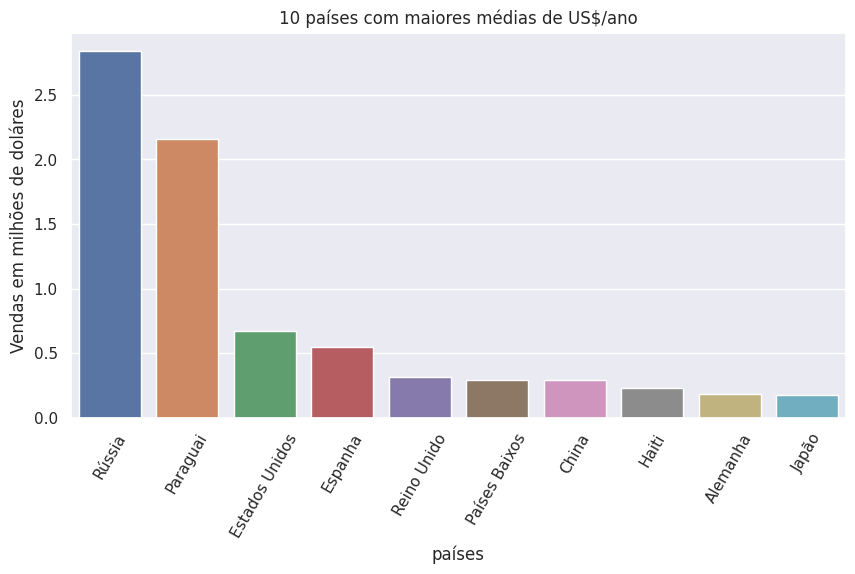

In [166]:
eixo_y_v = df_prop_ano_valor['valor_prop'] / 1_000_000
plt.subplots(figsize=(10,5))

graf_3 = sns.barplot(df_prop_ano_valor, x='pais', y=eixo_y_v)
graf_3.set_xticklabels(labels=graf_3.get_xticklabels(), rotation=60)
graf_3.set(xlabel="países", ylabel="Vendas em milhões de doláres", title="10 países com maiores médias de US$/ano")

In [167]:
df_prop_ano_quant = df_prop_ano[['pais', 'quant_prop']]
df_prop_ano_quant = df_prop_ano_quant.sort_values('quant_prop', ascending=False).head(10).round(decimals=0)
df_prop_ano_quant

,pais,quant_prop
31,Rússia,4358906.0
1,Paraguai,1694904.0
41,Espanha,284714.0
6,Estados Unidos,254817.0
37,Haiti,176871.0
7,China,160780.0
11,Países Baixos,100726.0
3,Japão,100154.0
2,Reino Unido,87022.0
8,Alemanha,68062.0


[Text(0.5, 0, 'países'),
 Text(0, 0.5, 'Quantidade exportada em milhões de litros'),
 Text(0.5, 1.0, '10 países com maiores médias de L/ano')]

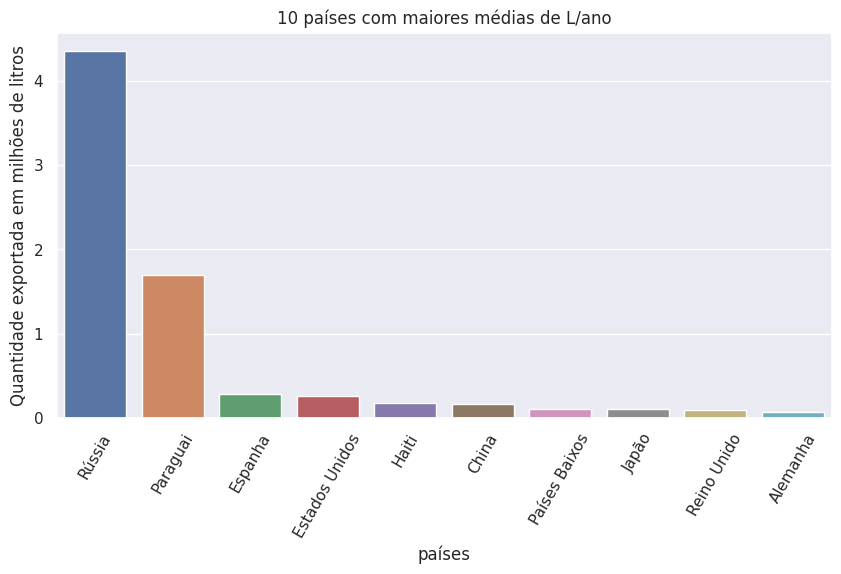

In [168]:
eixo_y_v = df_prop_ano_quant['quant_prop'] / 1_000_000
plt.subplots(figsize=(10,5))

graf_3 = sns.barplot(df_prop_ano_quant, x='pais', y=eixo_y_v)
graf_3.set_xticklabels(labels=graf_3.get_xticklabels(), rotation=60)
graf_3.set(xlabel="países", ylabel="Quantidade exportada em milhões de litros", title="10 países com maiores médias de L/ano")